In [1]:
# Advisory indices

# COC=0
# WL=1
# WR=2
# SL=3
# SR=4

PRE, pra = 0,0       # Previous Advisory 
TAU, tau = 20,20      # Time to loss of horizontal separation
PROP = 0             # Safety property
ver = 6              # Neural network version
table_ver = 6        # Table Version

In [2]:
# Load in training data
import h5py
import numpy as np
trainingDataFiles = "./TrainingData/HCAS_rect_TrainingData_v%d_pra%d_tau%02d.h5" # File format for training data


print("Loading Data for HCAS, pra %02d, Network Version %d" % (pra, ver))
f       = h5py.File(trainingDataFiles % (table_ver,pra,tau),'r')
X_train = np.array(f['X']).astype('float32')
y_train       = np.array(f['y']).astype('float32')
Q       = np.array(f['y']).astype('float32')
means = np.array(f['means'])
ranges=np.array(f['ranges'])
mins = np.array(f['min_inputs'])
maxes = np.array(f['max_inputs'])
y_train = np.argmax(y_train, axis=1)
print(means)
print(ranges)
print(mins)
print(maxes)

Loading Data for HCAS, pra 00, Network Version 6
[ 1.14237500e+04 -7.26499302e-19  8.19623304e-17 -2.42819387e-01]
[5.60000000e+04 6.28318531e+00 6.28318531e+00 1.74792249e+01]
[ 0.         -3.14159265 -3.14159265]
[5.60000000e+04 3.14159265e+00 3.14159265e+00]


In [3]:
# COC = 0 = 'b'
# WL  = 1 = 'c'
# WR  = 2 = 'm'
# SL  = 3 = 'g'
# SR  = 4 = 'r'
color_code = ['b', 'c', 'm', 'g', 'r']

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)
scat_x = []
scat_y = []
colors = []
for i in range(len(X_train)):
    if(y_train[i] == 0):
        continue
    x,y = pol2cart(X_train[i][0]+0.21, X_train[i][1]*3.1415)
    scat_x.append(x)
    scat_y.append(y)
    colors.append(color_code[y_train[i]])


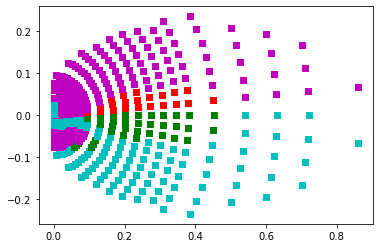

In [4]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(x=scat_x, y=scat_y, c=colors, marker='s')

plt.show()

In [5]:
n_concur = 5
p_concur = 0
mins = np.min(X_train, axis=0)
maxs = np.max(X_train, axis=0)
desc = [25,5,5]
radi = ((maxs-mins)/desc)/2
print(radi)

inps = []
lowers = []
uppers = []
print((maxs[0]-mins[0])/25)
for a in np.linspace(mins[0], maxs[0], desc[0]):
    for b in np.linspace(mins[1], maxs[1], desc[1]):
        for c in np.linspace(mins[2], maxs[2], desc[2]):
            inps.append([a,b,c])
            lowers.append([a,b,c] - radi)
            uppers.append([a,b,c] + radi)
            
#indexes = np.linspace(0, len(inps), n_concur)
#a = int(indexes[p_concur])
#b = int(indexes[p_concur+1])
#inps = inps[a:b]

[0.02 0.1  0.1 ]
0.04


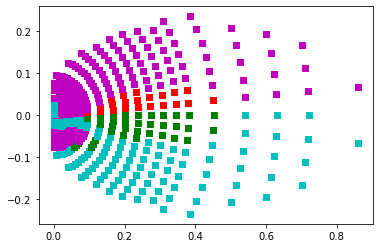

In [6]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(x=scat_x, y=scat_y, c=colors, marker='s')

plt.show()

In [7]:
# Load in verification logs
import os
import json
import numpy as np
import pandas as pd

def process_log(path_to_log):
    rows = []
    with open(path_to_log) as log_file:
        for line in log_file:
            #print(json.loads(line))
            entry = json.loads(line)
            rows.append(json.loads(line))
    return pd.DataFrame.from_dict(rows, orient='columns')

def process_log_both(path_lower, path_upper):
    rows = []
    with open(path_lower) as log_file:
        for line in log_file:
            #print(json.loads(line))
            entry = json.loads(line)
            rows.append(json.loads(line))
    #df.loc[df['A'] == 'foo']
    dflower = pd.DataFrame.from_dict(rows, orient='columns')
    rows = []
    with open(path_upper) as log_file:
        for line in log_file:
            entry = json.loads(line)
            rows.append(json.loads(line))
    dfupper = pd.DataFrame.from_dict(rows, orient='columns')
    data = pd.merge(data_low, data_high, on="Index")
    return pd.DataFrame.from_dict(rows, orient='columns')

path = "GridDecLogs/HCAS_Bounds_%s_%s_%s_lower.log"%(PRE, TAU, PROP)

print(path)
data = process_log(path)

GridDecLogs/HCAS_Bounds_0_20_0_lower.log


In [8]:
loc_x = []
loc_y = []
color = []
s = 0
u = 0
total = 0
for index, row in data.iterrows():
    safe = float(row["Lower"])
    ind  = int(row["Index"])
    #print(ind)
    inp = inps[ind]
    #print(inp)
    rho,theta = (inp[0]+0.20399554), inp[1]*3.1415
    x,y = pol2cart(rho, theta)
    #x,y = cart2pol(inp[0], inp[1])
    if(safe > 0.3):
        s+=1
        loc_x.append(x)
        loc_y.append(y)
        color.append('g')
    else:
        #continue
        u+=1
        loc_x.append(x)
        loc_y.append(y)
        color.append('r')
    total += 1
    
print(s, total)
print(s/total)
print(u/total)

329 546
0.6025641025641025
0.3974358974358974


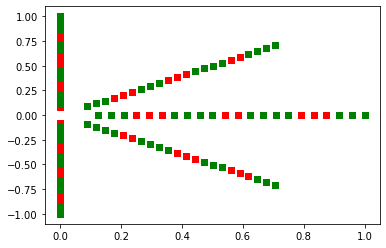

In [9]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(x=loc_x, y=loc_y, c=color, marker='s')
plt.show()

    Index     Lower  Samples  Margin  Epsilon  Depth  PRA  TAI  PHI
2      52  0.241499        3    2.75       -1      3    0   20    0
6      72  0.242454        3    2.75       -1      3    0   20    0
11     75  0.460110        3    2.75       -1      3    0   20    0
15     76  0.449253        3    2.75       -1      3    0   20    0
19     77  0.376649        3    2.75       -1      3    0   20    0


<AxesSubplot:xlabel='Lower', ylabel='Count'>

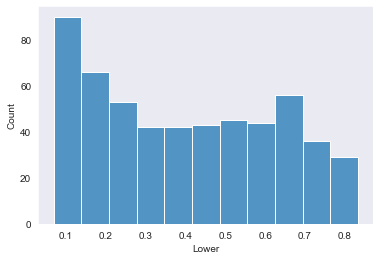

In [10]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

path = "GridDecLogs/HCAS_Bounds_%s_%s_%s_lower.log"%(PRE, TAU, PROP)
data = process_log(path)
data = data.sort_values("Index")
print(data.head())

sns.set_style('dark')
sns.histplot(data=data, x='Lower')

     Index     Upper  Samples  Margin  Epsilon  Depth  PRA  TAI  PHI
717     52  0.358221        3    2.75       -1      3    0   20    0
820     52  0.358046        3    2.75       -1      3    0   20    0
575     52  0.357452        3    2.75       -1      3    0   20    0
3       52  0.357159        3    2.75       -1      3    0   20    0
937     52  0.357847        3    2.75       -1      3    0   20    0


<AxesSubplot:xlabel='Upper', ylabel='Count'>

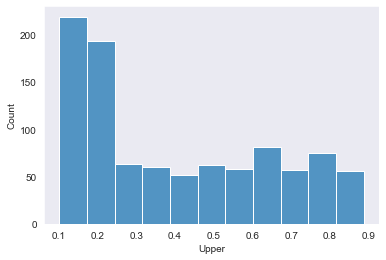

In [11]:
path = "GridDecLogs/HCAS_Bounds_%s_%s_%s_upper.log"%(PRE, TAU, PROP)
data = process_log(path)
data = data.sort_values("Index")
print(data.head())
sns.set_style('dark')
sns.histplot(data=data, x='Upper')

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MultipleLocator
sns.set_context("paper", rc={'axes.labelsize': 32.6,
 'axes.titlesize': 28.2,
 'font.size': 32.2,
 'grid.linewidth': 1.6,
 'legend.fontsize': 16.0,
 'lines.linewidth': 2.8,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 11.2,
 'patch.linewidth': 0.48,
 'xtick.labelsize': 24.0,
 'xtick.major.pad': 11.2,
 'xtick.major.width': 1.6,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 24.0,
 'ytick.major.pad': 11.2,
 'ytick.major.width': 1.6,
 'ytick.minor.width': 0.8}) 


In [13]:
path = "GridDecLogs/HCAS_Bounds_%s_%s_%s_lower.log"%(PRE, TAU, PROP)
data_low = process_log(path)
data_low = data_low.sort_values("Index")
print(data_low.head())

path = "GridDecLogs/HCAS_Bounds_%s_%s_%s_upper.log"%(PRE, TAU, PROP)
data_high = process_log(path)
data_high = data_high.sort_values("Index")
print(data_high.head())

    Index     Lower  Samples  Margin  Epsilon  Depth  PRA  TAI  PHI
2      52  0.241499        3    2.75       -1      3    0   20    0
6      72  0.242454        3    2.75       -1      3    0   20    0
11     75  0.460110        3    2.75       -1      3    0   20    0
15     76  0.449253        3    2.75       -1      3    0   20    0
19     77  0.376649        3    2.75       -1      3    0   20    0
     Index     Upper  Samples  Margin  Epsilon  Depth  PRA  TAI  PHI
717     52  0.358221        3    2.75       -1      3    0   20    0
820     52  0.358046        3    2.75       -1      3    0   20    0
575     52  0.357452        3    2.75       -1      3    0   20    0
3       52  0.357159        3    2.75       -1      3    0   20    0
937     52  0.357847        3    2.75       -1      3    0   20    0


In [14]:
print(len(data_low))
print(len(data_high))
errors = 0; correct = 0
for index, row in data_low.iterrows():
    lower_row = row
    try:
        upper_row = data_high.loc[index]
    except:
        break
    if(upper_row['Index'] != lower_row['Index']):
        continue
    if(upper_row['Upper'] - lower_row['Lower'] < -0.2):
        #print(upper_row['Upper'], lower_row['Lower'])
        errors += 1
    else:
        correct += 1
print(errors, correct)

546
976
0 87


In [24]:
data = pd.merge(data_low, data_high, on="Index")
errors = 0
for index, row in data.iterrows():
    if(row['Upper'] - row['Lower'] < -0.2):
        errors += 1
print(errors)


bound = []
upporlow = []
for index, row in data.iterrows():
    bound.append(row["Upper"]+0.1)
    bound.append(row["Lower"]+0.1)
    upporlow.append("Upper")
    upporlow.append("Lower")
    #upporlow.append(1)
    #upporlow.append(0)
pair_df = pd.DataFrame({'Bound': bound, 'Type':upporlow})
pair_df.head()

0


,Bound,Type
0,0.458221,Upper
1,0.341499,Lower
2,0.458046,Upper
3,0.341499,Lower
4,0.457452,Upper


Text(0.5, 1.0, 'Bound Comparison')

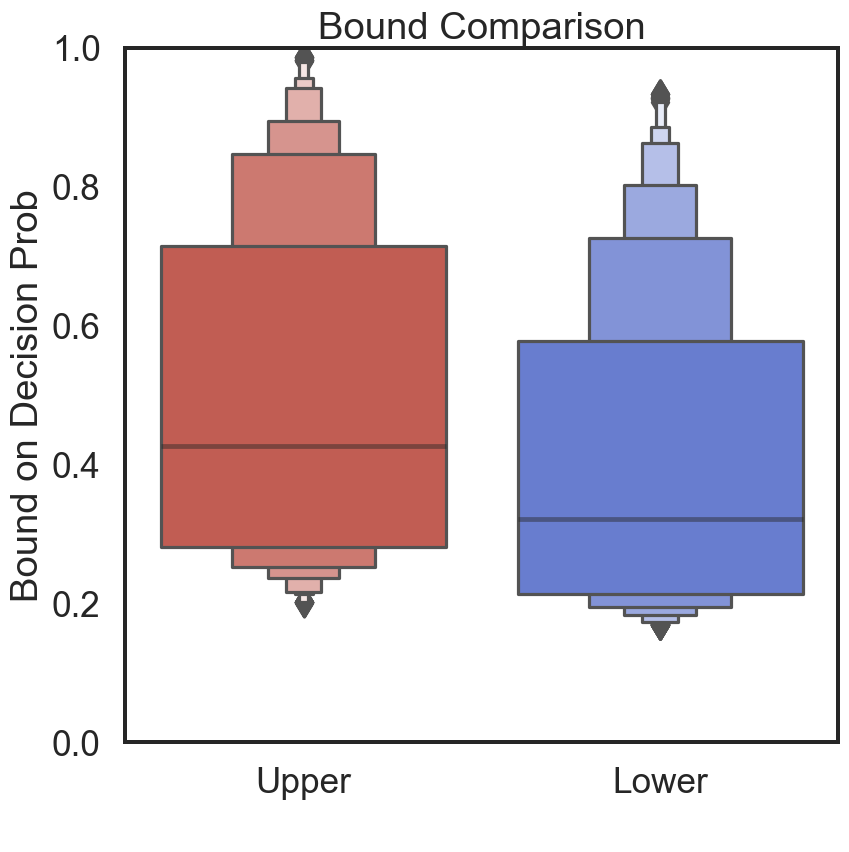

In [30]:
plt.figure(num=None, figsize=(8, 8), dpi=115)
sns.set_style('white')
sns.set_context('poster')
p = sns.color_palette("coolwarm", 10)
pal = [p[9], p[0]]

sns.boxenplot(data=pair_df, y="Bound", x="Type", palette=pal)
plt.ylabel('Bound on Decision Prob')
plt.ylim((0,1))
plt.xlabel(' ')
plt.title('Bound Comparison')

/Users/matthewwicker/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/matthewwicker/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, ' ')

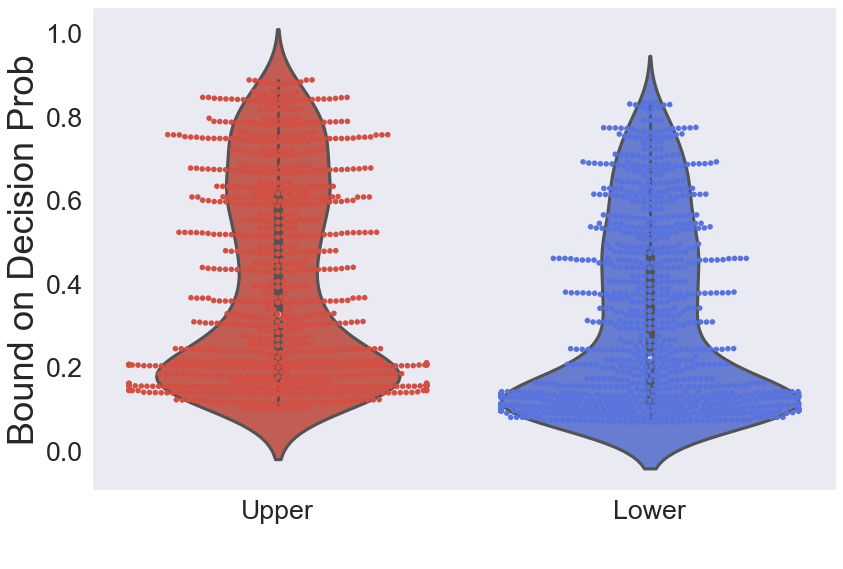

In [17]:
figure(figsize=(12, 8), dpi=80)
p = sns.color_palette("coolwarm", 10)
pal = [p[9], p[0]]

sns.violinplot(data=pair_df, y="Bound", x="Type", palette=pal)
sns.swarmplot(data=pair_df, y="Bound", x="Type", palette=pal)
plt.ylabel('Bound on Decision Prob')
plt.xlabel(' ')

In [18]:
gap = []
for index, row in data.iterrows():
    gap.append(row["Upper"] - row["Lower"])
gap_df = pd.DataFrame({'Gap': gap})
gap_df.head()

,Gap
0,0.116723
1,0.116548
2,0.115953
3,0.115660
4,0.116348


Text(0.5, 1.0, 'Bound Gap')

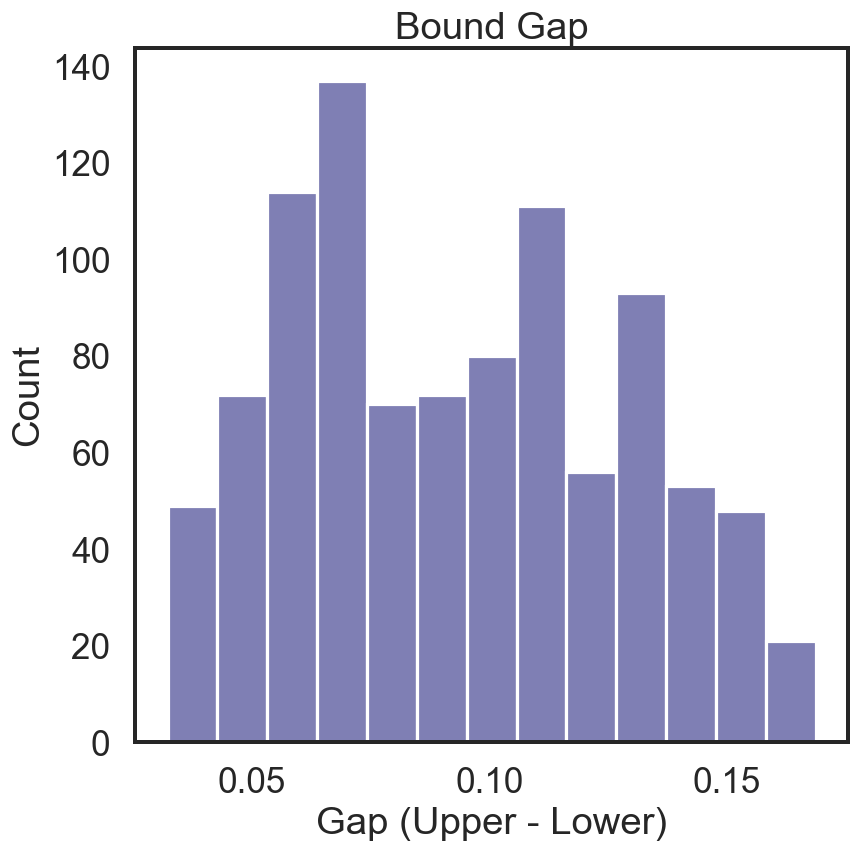

In [31]:
plt.figure(num=None, figsize=(8, 8), dpi=115)
sns.set_style('white')
sns.set_context('poster')
sns.histplot(data=gap_df, x='Gap', fill=True, color="#00006B", alpha=0.5)
plt.xlabel('Gap (Upper - Lower)')
plt.title('Bound Gap')

Text(0.5, 0, 'Gap (Upper - Lower)')

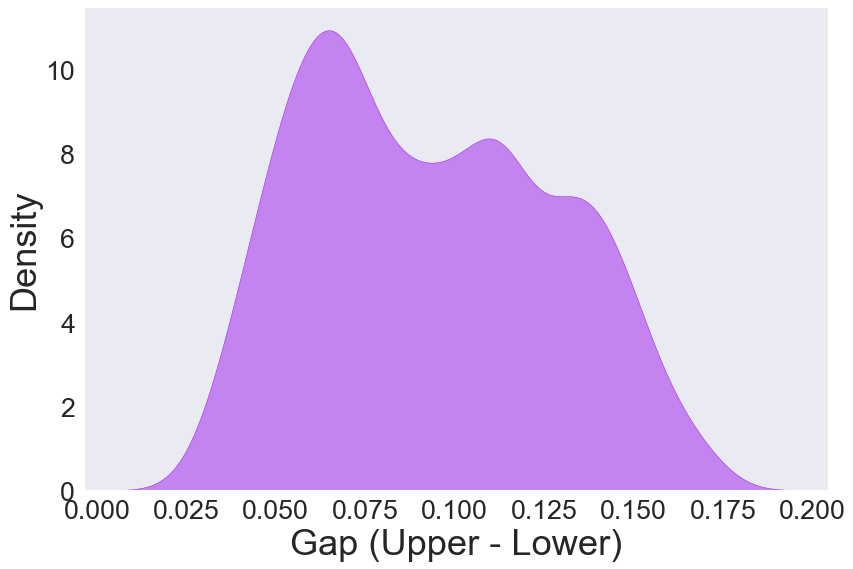

In [20]:
figure(figsize=(12, 8), dpi=80)
sns.kdeplot(data=gap_df, x='Gap', fill=True, color="#A020F0", alpha=0.5)
plt.xlabel('Gap (Upper - Lower)')